In [1]:
import sklearn 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("IMDB Dataset.csv")
df = df1.head(50000)

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
sum(df["sentiment"]=="positive")

25000

In [5]:
sum(df["sentiment"]=="negative")

25000

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder().fit_transform(df['sentiment'])
df.insert(2, "Sent_vale", label)
df

,review,sentiment,Sent_vale
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [8]:
import re

Replace_No_Space = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
Replace_With_Spaces = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [9]:
import preprocessor as p

def IMDB_Clean(df):
    tempArr = []
    for line in df:
        tmpl = p.clean(line)
        tmpl = Replace_No_Space.sub("",tmpl.lower())
        tmpl = Replace_With_Spaces.sub(" ",tmpl)
        tempArr.append(tmpl)
    return tempArr

In [10]:
cleaned_review = IMDB_Clean(df["review"])
cleaned_review = pd.DataFrame(cleaned_review)

In [11]:
df["cleaned_review"] = cleaned_review

df.head()

,review,sentiment,Sent_vale,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production br br the film...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter matteis love in the time of money is a ...


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df["cleaned_review"].fillna(' '), df["Sent_vale"], test_size = 0.3, random_state=42, shuffle=True)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, stop_words='english')

vectorizer.fit(list(X_train) + list(X_test))

X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [14]:
from sklearn.metrics import f1_score,accuracy_score,precision_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

## SVM

Model performance for Training set
- Accuracy: 100.0
----------------------------------
Model performance for Test set
- Accuracy: 86.17333333333333
----------------------------------
- Precision: 86.38342789286185
----------------------------------
- F1-Score: 86.32647679324896
----------------------------------
Model performance for Cross-validation
- Accuracy: 86.0142857142857
----------------------------------
Model Classification report : 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7411
           1       0.86      0.86      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

----------------------------------
Model Confusion report - test data : 
[[6379 1032]
 [1042 6547]]
----------------------------------
Model ROC CURVE : 


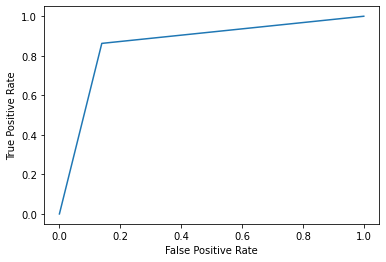

In [15]:
from sklearn.svm import LinearSVC
svm = LinearSVC(verbose=0)
svm.fit(X_train_vec,y_train)

# Make predictions
y_train_pred_svm = svm.predict(X_train_vec)
y_test_pred_svm = svm.predict(X_test_vec)

#Cross validation
svm_cross = (cross_val_score(svm,X_train_vec,y_train).mean())*100

# Training set performance
svm_linear_train_accuracy = accuracy_score(y_train, y_train_pred_svm)*100 # Calculate Accuracy

# Test set performance
svm_linear_test_accuracy = accuracy_score(y_test, y_test_pred_svm)*100 # Calculate Accuracy

# Test set precision
svm_linear_test_precision = precision_score(y_test, y_test_pred_svm)*100 # Calculate Accuracy

# Test set f1score
svm_linear_test_f1 = f1_score(y_test, y_test_pred_svm)*100 # Calculate Accuracy

print('Model performance for Training set')
print('- Accuracy: %s' % svm_linear_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_linear_test_accuracy)
print('----------------------------------')
print('- Precision: %s' % svm_linear_test_precision)
print('----------------------------------')
print('- F1-Score: %s' % svm_linear_test_f1)
print('----------------------------------')
print('Model performance for Cross-validation')
print('- Accuracy: %s' % svm_cross)
print('----------------------------------')

#classification Report
print('Model Classification report : ')
print(classification_report(y_test,y_test_pred_svm))
print('----------------------------------')

#confusion Report
print('Model Confusion report - test data : ')
print(confusion_matrix(y_test,y_test_pred_svm))
print('----------------------------------')

#ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test,y_test_pred_svm)

print('Model ROC CURVE : ')   
#plotting ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression

Model performance for Training set
- Accuracy: 99.70857142857142
----------------------------------
Model performance for Test set
- Accuracy: 88.06
----------------------------------
- Precision: 88.11464633184329
----------------------------------
- F1-Score: 88.21322803553801
----------------------------------
Model performance for Cross-validation
- Accuracy: 87.63714285714286
----------------------------------
Model Classification report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7411
           1       0.88      0.88      0.88      7589

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000

----------------------------------
Model Confusion report - test data : 
[[6507  904]
 [ 887 6702]]
----------------------------------
Model ROC CURVE : 


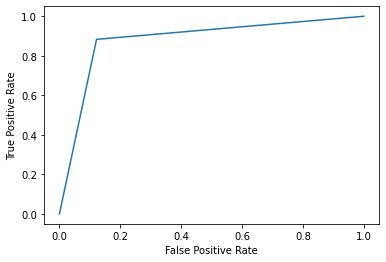

In [16]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_vec,y_train)

# Make predictions
y_train_pred_log = log.predict(X_train_vec)
y_test_pred_log = log.predict(X_test_vec)

#Cross validation
log_cross = (cross_val_score(log,X_train_vec,y_train).mean())*100

# Training set performance
log_train_accuracy = accuracy_score(y_train, y_train_pred_log)*100 # Calculate Accuracy

# Test set performance
log_test_accuracy = accuracy_score(y_test, y_test_pred_log)*100 # Calculate Accuracy

# Test set precision
log_test_precision = precision_score(y_test, y_test_pred_log)*100 # Calculate Accuracy

# Test set f1score
log_test_f1 = f1_score(y_test, y_test_pred_log)*100 # Calculate Accuracy

print('Model performance for Training set')
print('- Accuracy: %s' % log_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % log_test_accuracy)
print('----------------------------------')
print('- Precision: %s' % log_test_precision)
print('----------------------------------')
print('- F1-Score: %s' % log_test_f1)
print('----------------------------------')
print('Model performance for Cross-validation')
print('- Accuracy: %s' % log_cross)
print('----------------------------------')

#classification Report
print('Model Classification report : ')
print(classification_report(y_test,y_test_pred_log))
print('----------------------------------')

#confusion Report
print('Model Confusion report - test data : ')
print(confusion_matrix(y_test,y_test_pred_log))
print('----------------------------------')

#ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test,y_test_pred_log)

print('Model ROC CURVE : ')   
#plotting ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

Model performance for Training set
- Accuracy: 99.40571428571428
----------------------------------
Model performance for Test set
- Accuracy: 76.02
----------------------------------
- Precision: 80.36203224825069
----------------------------------
- F1-Score: 74.60283838169877
----------------------------------
Model performance for Cross-validation
- Accuracy: 76.03428571428572
----------------------------------
Model Classification report : 
              precision    recall  f1-score   support

           0       0.73      0.83      0.77      7411
           1       0.80      0.70      0.75      7589

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.77      0.76      0.76     15000

----------------------------------
Model Confusion report - test data : 
[[6120 1291]
 [2306 5283]]
----------------------------------
Model ROC CURVE : 


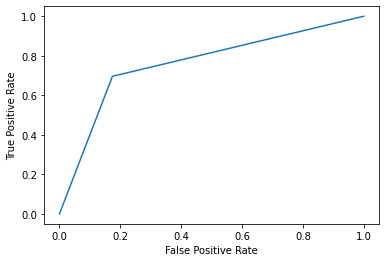

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train_vec,y_train) # Train model


# Make predictions
y_train_pred_rf = rf.predict(X_train_vec)
y_test_pred_rf = rf.predict(X_test_vec)

#Cross validation
rf_cross = (cross_val_score(rf,X_train_vec,y_train).mean())*100

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)*100 # Calculate Accuracy

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)*100 # Calculate Accuracy

# Test set precision
rf_test_precision = precision_score(y_test, y_test_pred_rf)*100 # Calculate Accuracy

# Test set f1score
rf_test_f1 = f1_score(y_test, y_test_pred_rf)*100 # Calculate Accuracy

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('----------------------------------')
print('- Precision: %s' % rf_test_precision)
print('----------------------------------')
print('- F1-Score: %s' % rf_test_f1)
print('----------------------------------')
print('Model performance for Cross-validation')
print('- Accuracy: %s' % rf_cross)
print('----------------------------------')

#classification Report
print('Model Classification report : ')
print(classification_report(y_test,y_test_pred_rf))
print('----------------------------------')

#confusion Report
print('Model Confusion report - test data : ')
print(confusion_matrix(y_test,y_test_pred_rf))
print('----------------------------------')

#ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test,y_test_pred_rf)

print('Model ROC CURVE : ')   
#plotting ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## NB CLASSIFIER

Model performance for Training set
- Accuracy: 91.02285714285713
----------------------------------
Model performance for Test set
- Accuracy: 85.02
----------------------------------
- Precision: 87.89727582292849
----------------------------------
- F1-Score: 84.64849354375896
----------------------------------
Model performance for Cross-validation
- Accuracy: 84.51142857142857
----------------------------------
Model Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7411
           1       0.88      0.82      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

----------------------------------
Model Confusion report - test data : 
[[6558  853]
 [1394 6195]]
----------------------------------
Model ROC CURVE : 


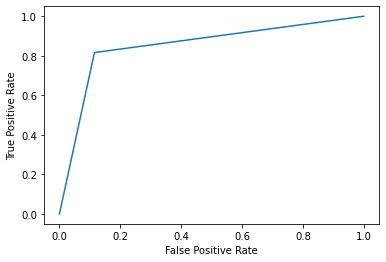

In [18]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() # Define classifier
bnb.fit(X_train_vec,y_train) # Train model


# Make predictions
y_train_pred_bnb = bnb.predict(X_train_vec)
y_test_pred_bnb = bnb.predict(X_test_vec)

#Cross validation
bnb_cross = (cross_val_score(bnb,X_train_vec,y_train).mean())*100

# Training set performance
bnb_train_accuracy = accuracy_score(y_train, y_train_pred_bnb)*100 # Calculate Accuracy

# Test set performance
bnb_test_accuracy = accuracy_score(y_test, y_test_pred_bnb)*100 # Calculate Accuracy

# Test set precision
bnb_test_precision = precision_score(y_test, y_test_pred_bnb)*100 # Calculate Accuracy

# Test set f1score
bnb_test_f1 = f1_score(y_test, y_test_pred_bnb)*100 # Calculate Accuracy

print('Model performance for Training set')
print('- Accuracy: %s' % bnb_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % bnb_test_accuracy)
print('----------------------------------')
print('- Precision: %s' % bnb_test_precision)
print('----------------------------------')
print('- F1-Score: %s' % bnb_test_f1)
print('----------------------------------')
print('Model performance for Cross-validation')
print('- Accuracy: %s' % bnb_cross)
print('----------------------------------')

#classification Report
print('Model Classification report : ')
print(classification_report(y_test,y_test_pred_bnb))
print('----------------------------------')

#confusion Report
print('Model Confusion report - test data : ')
print(confusion_matrix(y_test,y_test_pred_bnb))
print('----------------------------------')

#ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test,y_test_pred_bnb)

print('Model ROC CURVE : ')   
#plotting ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## STACKING CLASSIFIER

Model performance for Training set
- Accuracy: 99.71142857142857
----------------------------------
Model performance for Test set
- Accuracy: 88.82666666666667
----------------------------------
- Precision: 89.08129543952413
----------------------------------
- F1-Score: 88.94021380493598
----------------------------------
Model performance for Cross-validation
- Accuracy: 88.36571428571428
----------------------------------
Model Classification report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7411
           1       0.89      0.89      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

----------------------------------
Model Confusion report - test data : 
[[6585  826]
 [ 850 6739]]
----------------------------------
Model ROC CURVE : 


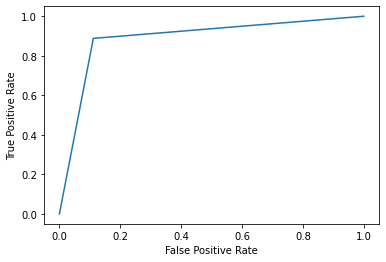

In [20]:
# Define estimators
from sklearn.ensemble import StackingClassifier

estimator_list = [
    ('svm',svm),
    ('rf',rf),
    ('log',log),
    ('bnb',bnb),
    ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train_vec,y_train)

# Make predictions
y_train_pred_stack_model = stack_model.predict(X_train_vec)
y_test_pred_stack_model = stack_model.predict(X_test_vec)

#Cross validation
stack_model_cross = (cross_val_score(stack_model,X_train_vec,y_train).mean())*100

# Training set performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred_stack_model)*100 # Calculate Accuracy

# Test set performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred_stack_model)*100 # Calculate Accuracy

# Test set precision
stack_model_test_precision = precision_score(y_test, y_test_pred_stack_model)*100 # Calculate Accuracy

# Test set f1score
stack_model_test_f1 = f1_score(y_test, y_test_pred_stack_model)*100 # Calculate Accuracy

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('----------------------------------')
print('- Precision: %s' % stack_model_test_precision)
print('----------------------------------')
print('- F1-Score: %s' % stack_model_test_f1)
print('----------------------------------')
print('Model performance for Cross-validation')
print('- Accuracy: %s' % stack_model_cross)
print('----------------------------------')

#classification Report
print('Model Classification report : ')
print(classification_report(y_test,y_test_pred_stack_model))
print('----------------------------------')

#confusion Report
print('Model Confusion report - test data : ')
print(confusion_matrix(y_test,y_test_pred_stack_model))
print('----------------------------------')

#ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test,y_test_pred_stack_model)

print('Model ROC CURVE : ')   
#plotting ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
acc_train_list = {
'svm_linear': svm_linear_train_accuracy,
'rf': rf_train_accuracy,
'bnb': bnb_train_accuracy,
'logistic': log_train_accuracy,
'stack': stack_model_train_accuracy}

acc_test_list = {
'svm_linear': svm_linear_test_accuracy,
'rf': rf_test_accuracy,
'bnb': bnb_test_accuracy,
'logistic': log_test_accuracy,
'stack': stack_model_test_accuracy}
     
precision_test_list = {
'svm_linear': svm_linear_test_precision,
'rf': rf_test_precision,
'bnb': bnb_test_precision,
'logistic': log_test_precision,
'stack': stack_model_test_precision}

f1_test_list = {
'svm_linear': svm_linear_test_f1,
'rf': rf_test_f1,
'bnb': bnb_test_f1,
'logistic': log_test_f1,
'stack': stack_model_test_f1}

In [22]:
import pandas as pd

acc_tr_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy_train'])
acc_te_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy_test'])
pre_te_df = pd.DataFrame.from_dict(precision_test_list, orient='index', columns=['Precision_test'])
f_te_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1_score_test'])
df = pd.concat([acc_tr_df, acc_te_df, pre_te_df, f_te_df], axis=1)
df

,Accuracy_train,Accuracy_test,Precision_test,F1_score_test
svm_linear,100.000000,86.173333,86.383428,86.326477
rf,99.405714,76.020000,80.362032,74.602838
bnb,91.022857,85.020000,87.897276,84.648494
logistic,99.708571,88.060000,88.114646,88.213228
stack,99.711429,88.826667,89.081295,88.940214


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

<AxesSubplot:>

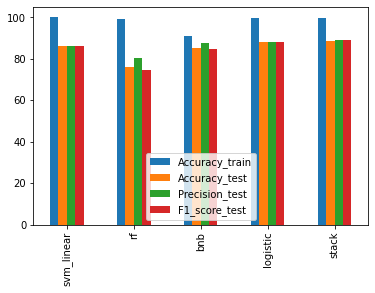

In [24]:
df.plot.bar()

<AxesSubplot:>

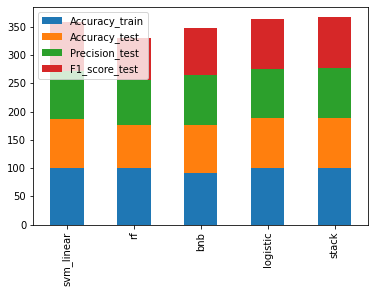

In [26]:
df.plot.bar(stacked=True)